## Regression in PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [3]:
# y = m * x + b
#Some random noise added
y = -0.5*x + 2 + torch.normal(mean = torch.zeros(8), std = 0.2)  

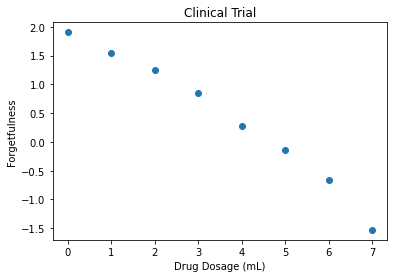

In [4]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel('Drug Dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x, y)

In [5]:
m = torch.tensor([0.9]).requires_grad_()
print(m)

tensor([0.9000], requires_grad=True)


In [6]:
b = torch.tensor([0.1]).requires_grad_()
print(b)

tensor([0.1000], requires_grad=True)


In [7]:
#Define our regression function
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b

In [8]:
yhat = regression(x, m, b)
print(yhat)

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)


In [9]:
#Mean square error
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma / len(my_y)

In [10]:
#Cost function
C = mse(yhat, y)
print(C)

tensor(17.8514, grad_fn=<DivBackward0>)


### Auto-diff to calculate gradient C

In [11]:
C.backward()

In [12]:
m.grad

tensor([34.1175])

In [13]:
b.grad

tensor([5.6253])

## Gradient Descent - PyTorch

In [14]:
optimizer = torch.optim.SGD([m, b], lr = 0.01)
optimizer.step()        #Take one step

In [16]:
print(str(m) + '\n' + str(b))

tensor([0.5588], requires_grad=True)
tensor([0.0437], requires_grad=True)


### Run 1000 epochs

In [17]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()       #Reset gradient to zero in each pass
    yhat = regression(x, m, b)
    C = mse(yhat, y)
    C.backward()
    optimizer.step()
    print('Epoch {}, Cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), 
                            '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, Cost 8.07, m grad 21.8, b grad 3.12
Epoch 1, Cost 4.11, m grad 13.9, b grad 1.54
Epoch 2, Cost 2.49, m grad 8.95, b grad 0.531
Epoch 3, Cost 1.83, m grad 5.78, b grad -0.107
Epoch 4, Cost 1.56, m grad 3.77, b grad -0.509
Epoch 5, Cost 1.44, m grad 2.48, b grad -0.763
Epoch 6, Cost 1.38, m grad 1.67, b grad -0.921
Epoch 7, Cost 1.35, m grad 1.15, b grad -1.02
Epoch 8, Cost 1.32, m grad 0.818, b grad -1.08
Epoch 9, Cost 1.31, m grad 0.607, b grad -1.12
Epoch 10, Cost 1.29, m grad 0.473, b grad -1.14
Epoch 11, Cost 1.28, m grad 0.387, b grad -1.15
Epoch 12, Cost 1.26, m grad 0.332, b grad -1.15
Epoch 13, Cost 1.25, m grad 0.296, b grad -1.15
Epoch 14, Cost 1.23, m grad 0.273, b grad -1.15
Epoch 15, Cost 1.22, m grad 0.258, b grad -1.14
Epoch 16, Cost 1.2, m grad 0.248, b grad -1.14
Epoch 17, Cost 1.19, m grad 0.241, b grad -1.13
Epoch 18, Cost 1.18, m grad 0.236, b grad -1.13
Epoch 19, Cost 1.16, m grad 0.232, b grad -1.12
Epoch 20, Cost 1.15, m grad 0.229, b grad -1.12
Epoch 21,